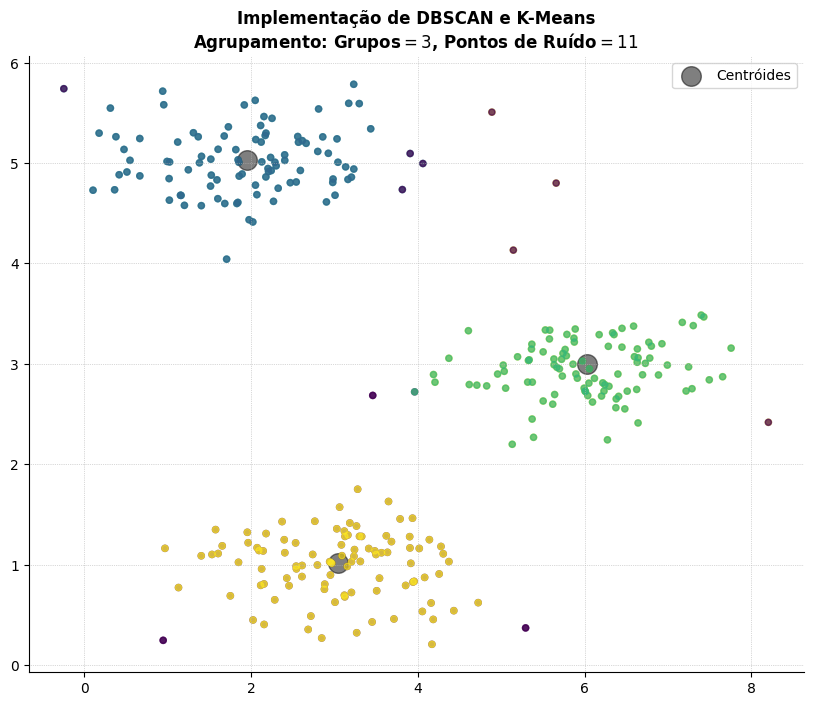

In [4]:
import scipy.io as spio #Essa biblioteca serve para manipular o arquivo .mat
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Salva o Dataset em uma uma variavel, para fazer a manipulação.
#E o arquivo tem uma estrutura de dadod complexa.
arquivo = 'ex7data2.mat'
coluna = ['X']

#Faz o carregamento do arquivo do dataset
raw_mat = spio.loadmat(arquivo)

#É uma variavel do tipo array onde vai buscar os dados do arquivo da coluna X
X = raw_mat.get('X')

#Visualização do resultado do agrupamento
plt.figure(figsize=(10,8)) #Tamanho da imagem que será plotada
plt.grid(color='0.7', linestyle=':', linewidth=0.5)

#Criação do modelo.
K = 3
kmeans = KMeans(n_clusters=K)
modelo = DBSCAN(eps=0.5, min_samples=5)#Modelo de treiamento usando DBSCAN

#Faz o treinamento do modelo.
kmeans.fit(X)

#Usa o modelo para identificação/definição dos grupos com Kmeans.
y_pred = kmeans.predict(X)
y_Pred = modelo.fit_predict(X)# Usa o modelo para a identificação dos grupos DBSCAN

#Identifica os centroides de cada grupo
kmeans.cluster_centers_
labels = modelo.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Plotagem da dispersão com cores diferentes para cada grupo.
#No gráfigo usamos os grupos previstos para a difinir a cor dos grupos
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20, cmap='viridis', alpha=0.7)
plt.grid(color='0.7', linestyle=':', linewidth=0.5)

#Plotagem da centroide de cada grupo
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5, label='Centróides')#Mostra onde é centro de cada grupo
plt.scatter(X[:, 0], X[:, 1], c=y_Pred, s=20, cmap='viridis', alpha=0.7)

#Configurações visuais 
plt.title(f'Implementação de DBSCAN e K-Means\nAgrupamento: Grupos$={n_clusters_}$, Pontos de Ruído$={n_noise_}$',fontweight='bold')

#Adiciona uma legenda no gráfico
plt.legend() 
sns.despine()
plt.savefig('./Img/ImagemAgrupamento.png')
plt.savefig('./Img/ImagemDBSCAN.png')